# Food AI

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [5]:
path = untar_data("https://s3.amazonaws.com/fast-ai-imageclas/food-101"); path

KeyboardInterrupt: ignored

In [0]:
path.ls()

In [0]:
path_img = path/'images'

In [0]:
train_df = pd.read_csv(path/'train.txt', header=None, names=['label', 'name'])
train_df['name'] = train_df['label'].astype(str) + ".jpg"
train_df['label'] = train_df.label.str.split("/").str[0]

test_df = pd.read_csv(path/'test.txt', header=None, names=['label', 'name'])
test_df['name'] = test_df['label'].astype(str) + ".jpg"
test_df['label'] = test_df.label.str.split("/").str[0]

train_df[:5]

We construct an ImageDataBunch from the train.txt file, and getting the corresponding image for each line.

In [0]:
data = (ImageList.from_df(df=train_df, path=path/'images', cols=1)
       .split_by_rand_pct(0.2)
       .label_from_df(cols=0)
       .transform(get_transforms(), size=224)
       .databunch(bs=bs)
       .normalize(imagenet_stats))

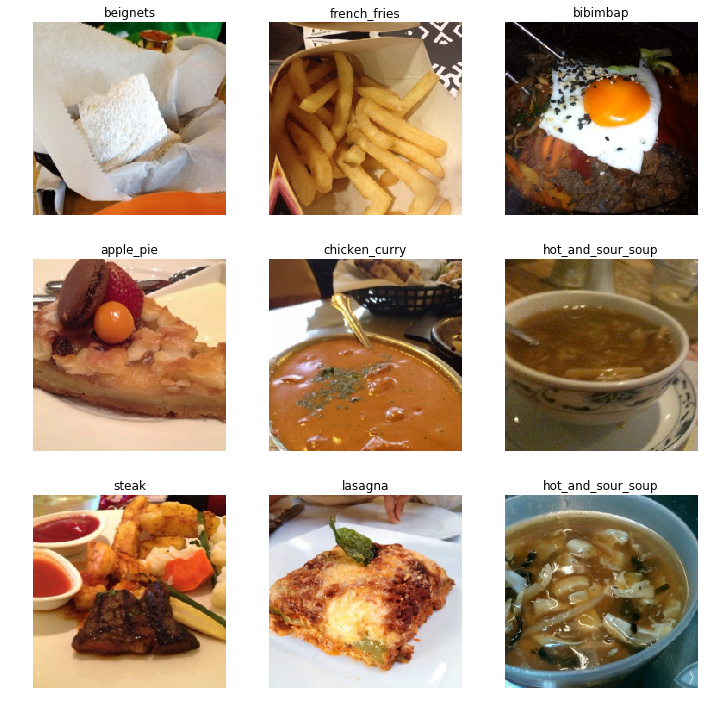

In [0]:
data.show_batch(rows=3, figsize=(10, 10))

In [0]:
print(data.classes)
len(data.classes),data.c

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

(101, 101)

## Training: resnet34

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

NameError: ignored

In [0]:
learn.save('stage-1')

## Results

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)